In [51]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [38]:
def readDict(filename, sep):
    with open(filename, "r") as f:
        value_dic = {}
        dtype_dic = {}
        stype_dic = {}
        label_dic = {}
        for line in f:
            key, values = line.split(sep)
            values = values.split(',')
            if 'value' in values[1]:
                value_dic[key] = int(values[0])
            elif "dtype" in values[1]:
                dtype_dic[key] = int(values[0])
            elif "stype" in values[1]:
                stype_dic[key] = int(values[0])
            elif "label" in values[1]:
                label_dic[key] = int(values[0])
            else:
                print('wow')
            #dict[values[0][2:-1]] = {int(x[:-3]) for x in values[1:len(values)]}
        return(value_dic, dtype_dic, stype_dic, label_dic)

In [630]:
cols = ['col_name','# unique values','# missing values','% missing values','base type','semantic type','# valid', '# null', '# invalid']
df_cols = pd.DataFrame(columns=cols)
outputs = os.listdir('./output')
outputs = [f for f in outputs if f[-3:]=='out']
cnt = 0
for file in outputs:
    df_cols.loc[cnt, 'col_name'] = file[:-4]
    value_dic, dtype_dic, stype_dic, label_dic = readDict('./output/'+file, '\t')
    df_cols.loc[cnt, '# unique values'] = len(value_dic)
    if value_dic.get('NULL'):
        df_cols.loc[cnt, '# missing values'] = int(value_dic.get('NULL'))
        df_cols.loc[cnt, '% missing values'] = str(round(float(value_dic.get('NULL') / 5101231 * 100), 2))+'%'
    else:
        df_cols.loc[cnt, '# missing values'] = 0
        df_cols.loc[cnt, '% missing values'] = '0.0%'
    df_cols.loc[cnt, 'base type'] = ','.join(list(dtype_dic.keys()))
    df_cols.loc[cnt, 'semantic type'] = ','.join(list(stype_dic.keys()))
    df_cols.loc[cnt, '# valid'] = label_dic['VALID'] if 'VALID' in label_dic else 0
    df_cols.loc[cnt, '# null'] = label_dic['NULL'] if 'NULL' in label_dic else 0
    df_cols.loc[cnt, '# invalid'] = label_dic['INVALID'] if 'INVALID' in label_dic else 0
    cnt = cnt + 1
    #print(file)

In [631]:
df_cols

,col_name,# unique values,# missing values,% missing values,base type,semantic type,# valid,# null,# invalid
0,ADDR_PCT_CD,78,390,0.01%,"string,int",precinct,5100832,390,0
1,BORO_NM,6,463,0.01%,string,borough,5100759,463,0
2,CMPLNT_FR_DT,6372,655,0.01%,"datetime,string",date,5081785,655,18782
3,CMPLNT_FR_TM,1443,48,0.0%,"string,timestamp",time,5100271,48,903
4,CMPLNT_TO_DT,4828,1391476,27.28%,"datetime,string",date,3704859,1391476,4887
5,CMPLNT_TO_TM,1442,1387783,27.2%,"string,timestamp",time,3712063,1387783,1376
6,CRM_ATPT_CPTD_CD,3,7,0.0%,string,flag,5101215,7,0
7,HADEVELOPT,279,4848018,95.04%,string,address,253204,4848018,0
8,JURIS_DESC,25,0,0.0%,string,jurisdiction,5101222,0,0
9,KY_CD,74,0,0.0%,int,code,5101222,0,0


In [412]:
value_dic, dtype_dic, stype_dic, label_dic = readDict('./output/CMPLNT_FR_DT.out', '\t')
del value_dic['NULL']
# Use this line if you want to see outliers
#dates = {datetime.datetime.strptime(k, '%m/%d/%Y'):int(v) for k,v in value_dic.items()}
# Use this line if you want to remove outliers
dates = {datetime.datetime.strptime(k, '%m/%d/%Y'):int(v) for k,v in value_dic.items() if k[-4:] != '1015'}
x = sorted(dates)
y = [dates[k] for k in sorted(dates)]
fr_dt_df = pd.DataFrame(columns = ['date','count_from'])
fr_dt_df['date'] = x
fr_dt_df['count_from'] = y

In [222]:
fr_dt_df.head(8)

,date,count
0,1015-09-16,1
1,1015-09-26,1
2,1015-10-17,1
3,1015-10-27,1
4,1015-11-25,1
5,1015-12-04,2
6,1900-03-10,1
7,1900-05-08,1


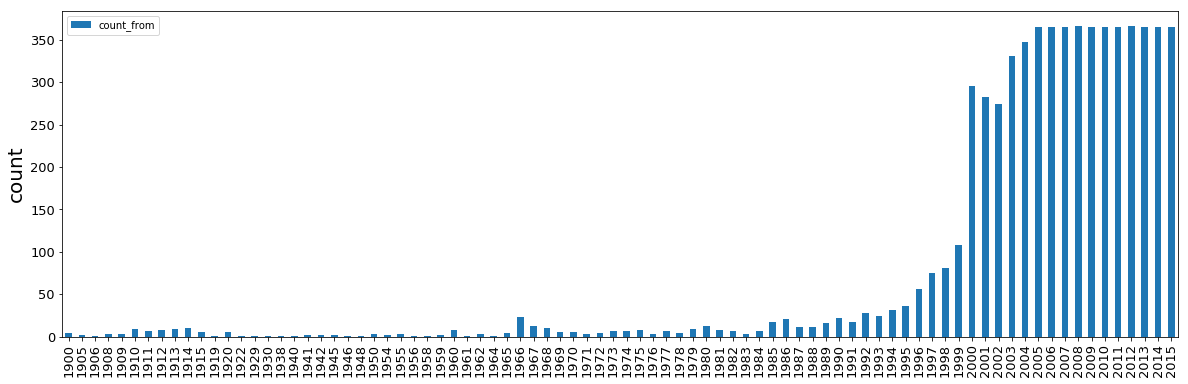

In [413]:
pd.to_datetime(fr_dt_df['date'])
f = fr_dt_df.groupby(fr_dt_df["date"].dt.year).count().plot(kind="bar",rot = 90,y='count_from',figsize=(20,6),fontsize=13)
f.set_ylabel('count', fontsize=20)
f.set_xlabel(' ', fontsize=20)
fig = f.get_figure()
fig.savefig('fr_date_count.jpg')

In [281]:
#fr_dt_df_small = fr_dt_df.iloc[]
fr_dt_df_small = fr_dt_df.iloc[818:,:]

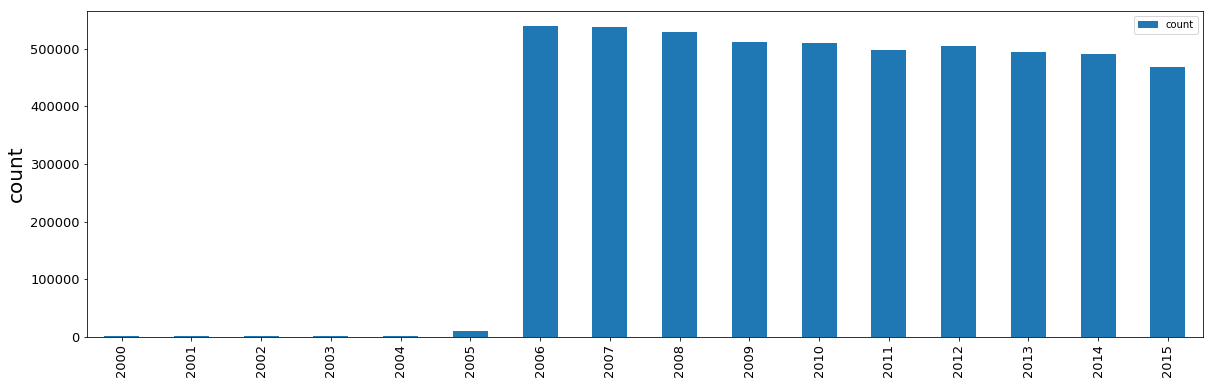

In [283]:
pd.to_datetime(fr_dt_df['date'])
f = fr_dt_df_small.groupby(fr_dt_df["date"].dt.year).sum().plot(kind="bar",rot = 90,y='count',figsize=(20,6),fontsize=13)
f.set_ylabel('count', fontsize=20)
f.set_xlabel(' ', fontsize=20)
fig = f.get_figure()
fig.savefig('fr_date_sum.jpg')

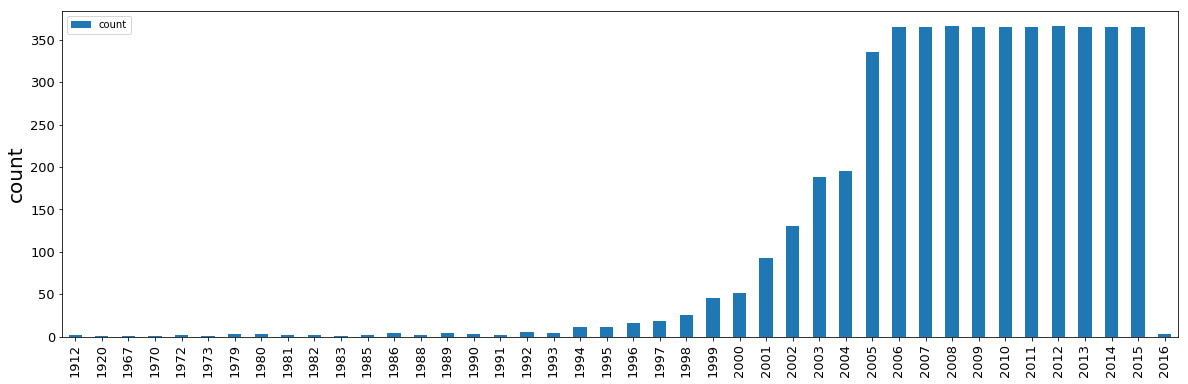

In [411]:
value_dic, dtype_dic, stype_dic, label_dic = readDict('./output/CMPLNT_TO_DT.out', '\t')
del value_dic['NULL']
# USe this line to see outliers
#dates = {datetime.datetime.strptime(k, '%m/%d/%Y'):int(v) for k,v in value_dic.items()}
# USe this line to remove outliers
dates = {datetime.datetime.strptime(k, '%m/%d/%Y'):int(v) for k,v in value_dic.items() if k[-4:]!='2090'}
x = sorted(dates)
y = [dates[k] for k in sorted(dates)]
to_dt_df = pd.DataFrame(columns = ['date','count'])
to_dt_df['date'] = x
to_dt_df['count'] = y
pd.to_datetime(to_dt_df['date'])
f = to_dt_df.groupby(to_dt_df["date"].dt.year).count().plot(kind="bar",rot = 90,y='count',figsize=(20,6),fontsize=13)
f.set_ylabel('count', fontsize=20)
f.set_xlabel(' ', fontsize=20)
fig = f.get_figure()
fig.savefig('to_date_count.jpg')

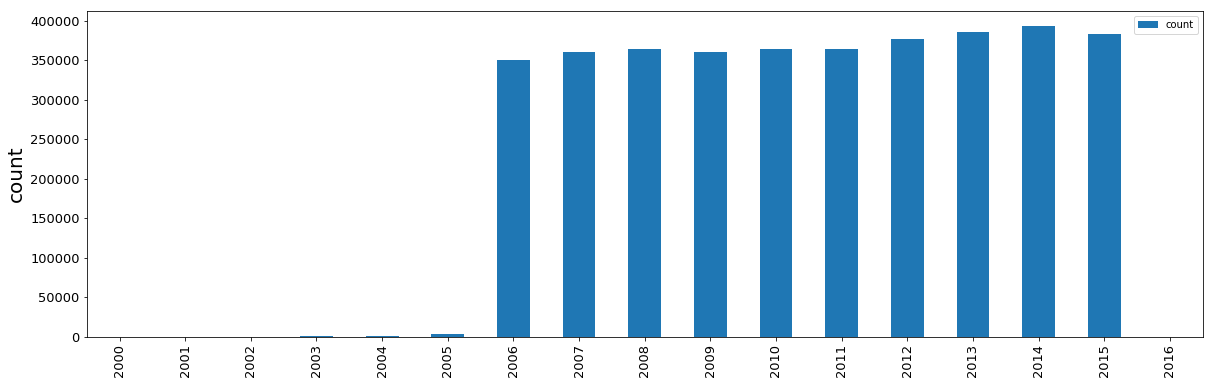

In [296]:
datedf_small = datedf[177:]
f = datedf_small.groupby(datedf["date"].dt.year).sum().plot(kind="bar",rot = 90,y='count',figsize=(20,6),fontsize=13)
f.set_ylabel('count', fontsize=20)
f.set_xlabel(' ', fontsize=20)
fig = f.get_figure()
fig.savefig('to_date_sum.jpg')

In [208]:
to_dt_df.tail(8)

,date,count
4819,2015-12-28,912
4820,2015-12-29,831
4821,2015-12-30,882
4822,2015-12-31,722
4823,2016-01-02,1
4824,2016-01-11,1
4825,2016-03-02,1
4826,2090-04-06,1


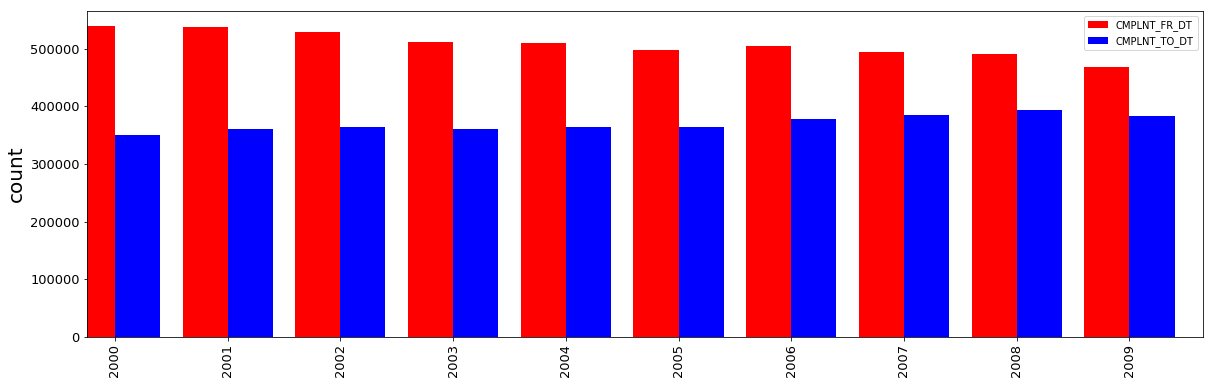

In [650]:
fr_dt_df_small = fr_dt_df[2713:]
to_dt_df_small = to_dt_df[1171:4823]
df1 = fr_dt_df_small.groupby(fr_dt_df["date"].dt.year).sum().reset_index()
df2 = to_dt_df_small.groupby(to_dt_df["date"].dt.year).sum().reset_index()
df_merge = df1.merge(df2, how='outer', on='date')
df_merge = df_merge.fillna(0)
fig = plt.figure(figsize=(20,6)) # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
width = 0.4
b1 = df_merge.plot(kind="bar",color='red',y='count_from', ax=ax, width=width, position=1,fontsize=13,label='CMPLNT_FR_DT')
b2 = df_merge.plot(kind="bar",color='blue',y='count', ax=ax, width=width, position=0,fontsize=13,label='CMPLNT_TO_DT')
b1.set_ylabel('count', fontsize=20)
ax.legend()
ax.set_xticklabels(np.arange(2000,2017))
plt.show()
fig.savefig('dt_bar.jpg')

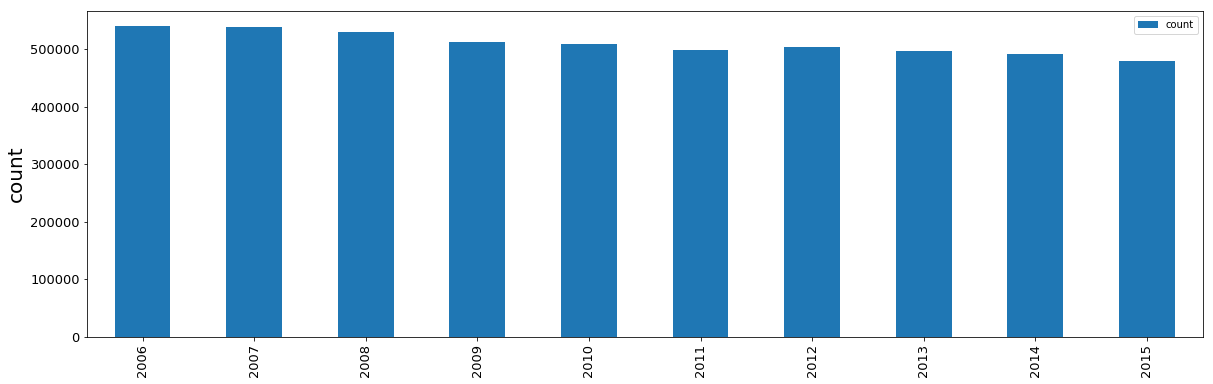

In [299]:
value_dic, dtype_dic, stype_dic, label_dic = readDict('./output/RPT_DT.out', '\t')
#del value_dic['NULL']
# USe this line to see outliers
dates = {datetime.datetime.strptime(k, '%m/%d/%Y'):int(v) for k,v in value_dic.items()}
# USe this line to remove outliers
#dates = {datetime.datetime.strptime(k, '%m/%d/%Y'):int(v) for k,v in value_dic.items() if k[-4:]!='2090'}
x = sorted(dates)
y = [dates[k] for k in sorted(dates)]
datedf = pd.DataFrame(columns = ['date','count'])
datedf['date'] = x
datedf['count'] = y
pd.to_datetime(datedf['date'])
f = datedf.groupby(datedf["date"].dt.year).sum().plot(kind="bar",rot = 90,y='count',figsize=(20,6),fontsize=13)
f.set_ylabel('count', fontsize=20)
f.set_xlabel(' ', fontsize=20)
fig = f.get_figure()
fig.savefig('rpt_date_sum.jpg')

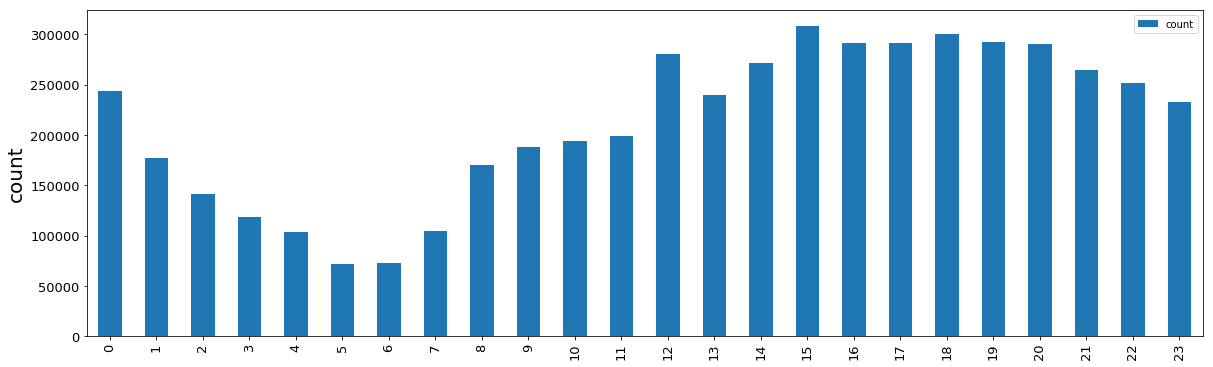

In [325]:
value_dic, dtype_dic, stype_dic, label_dic = readDict('./output/CMPLNT_FR_TM.out', '\t')
value_dic['00:00:00'] = value_dic['00:00:00'] + value_dic['24:00:00']
del value_dic['24:00:00']
del value_dic['NULL']
times = {datetime.datetime.strptime(k, '%H:%M:%S'):int(v) for k,v in value_dic.items()}
x = sorted(times)
y = [times[k] for k in sorted(times)]
timedf1 = pd.DataFrame(columns = ['time','count'])
timedf1['time'] = x
timedf1['count'] = y
pd.to_datetime(timedf1['time'])
f = timedf1.groupby(timedf1["time"].dt.hour).sum().plot(kind="bar",rot = 90,y='count',figsize=(20,6),fontsize=13)
f.set_ylabel('count', fontsize=20)
f.set_xlabel(' ', fontsize=20)
fig = f.get_figure()
fig.savefig('fr_time_sum.jpg')

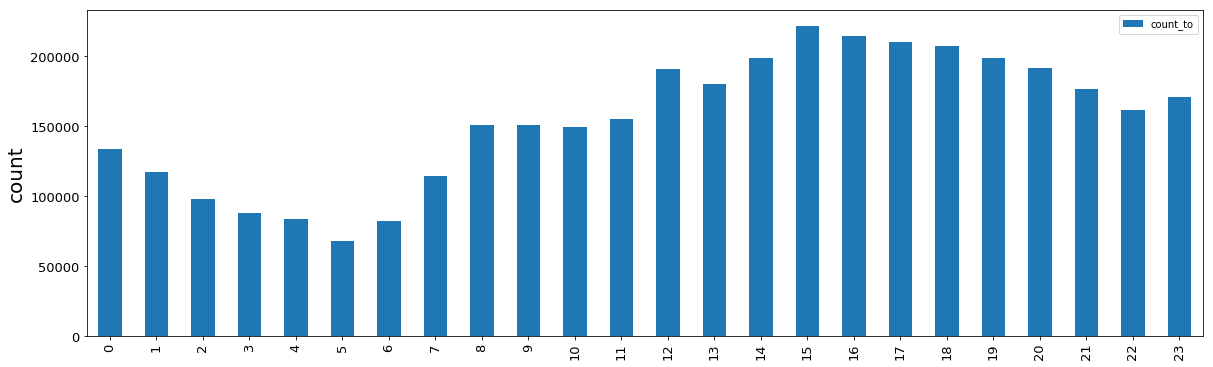

In [327]:
value_dic, dtype_dic, stype_dic, label_dic = readDict('./output/CMPLNT_TO_TM.out', '\t')
value_dic['00:00:00'] = value_dic['00:00:00'] + value_dic['24:00:00']
del value_dic['24:00:00']
del value_dic['NULL']
times = {datetime.datetime.strptime(k, '%H:%M:%S'):int(v) for k,v in value_dic.items()}
x = sorted(times)
y = [times[k] for k in sorted(times)]
timedf = pd.DataFrame(columns = ['time','count_to'])
timedf['time'] = x
timedf['count_to'] = y
pd.to_datetime(timedf['time'])
f = timedf.groupby(timedf["time"].dt.hour).sum().plot(kind="bar",rot = 90,y='count_to',figsize=(20,6),fontsize=13)
f.set_ylabel('count', fontsize=20)
f.set_xlabel(' ', fontsize=20)
fig = f.get_figure()
fig.savefig('to_time_sum.jpg')

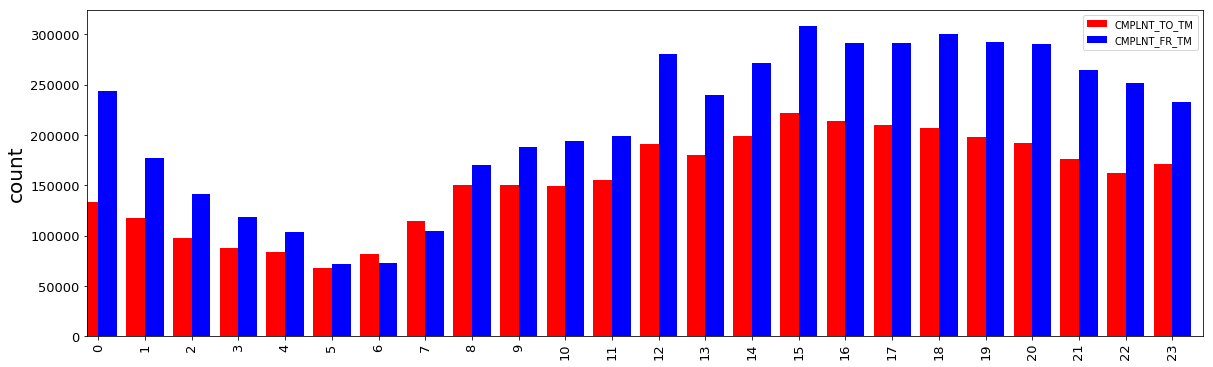

In [407]:
df1 = timedf1.groupby(timedf1["time"].dt.hour).sum().reset_index()
df2 = timedf.groupby(timedf["time"].dt.hour).sum().reset_index()
df_merge = df1.merge(df2, how='left', on='time')
fig = plt.figure(figsize=(20,6)) # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
width = 0.4

b1 = df_merge.plot(kind="bar",color='red',y='count_to', ax=ax, width=width, position=1,fontsize=13,label='CMPLNT_TO_TM')
b2 = df_merge.plot(kind="bar",color='blue',y='count', ax=ax, width=width, position=0,fontsize=13,label='CMPLNT_FR_TM')
b1.set_ylabel('count', fontsize=20)
ax.legend()
plt.show()
fig.savefig('tm_bar.jpg')

In [487]:
value_dic1, dtype_dic, stype_dic, label_dic = readDict('./output/KY_CD.out', '\t')
l1 = sorted(value_dic1.items(), key=lambda x: x[1], reverse=True)[:10]
value_dic2, dtype_dic, stype_dic, label_dic = readDict('./output/PD_CD.out', '\t')
l2 = sorted(value_dic2.items(), key=lambda x: x[1], reverse=True)[:10]

In [488]:
ky_key = [i[0] for i in l1]
ky_val = [int(value_dic1[k]) for k in ky_key]
pd_key = [i[0] for i in l2]
pd_val = [int(value_dic2[k]) for k in pd_key]

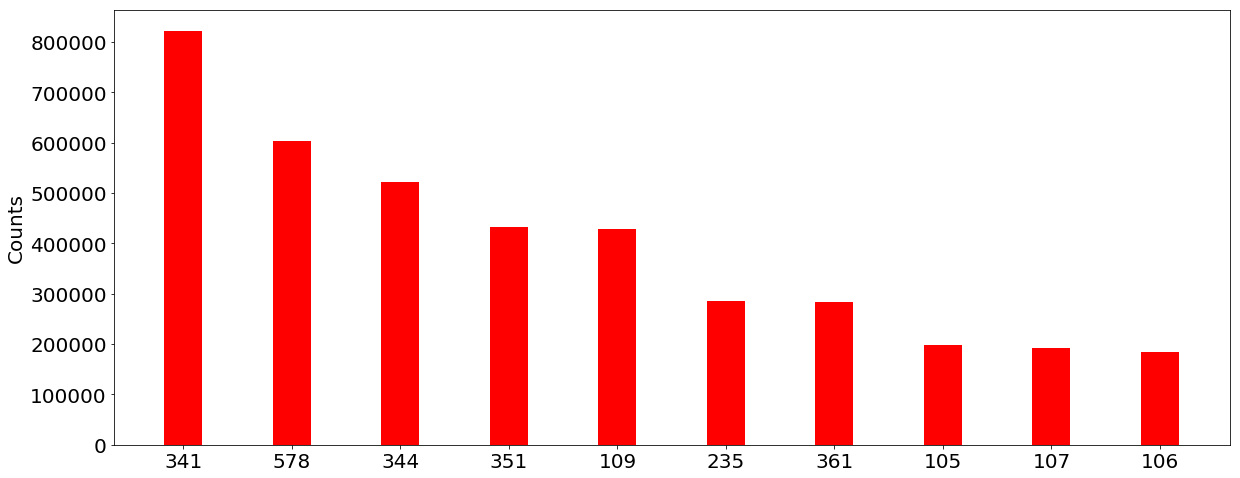

In [489]:
fig, ax = plt.subplots(figsize=(20,8))
width = 0.35 
plt.bar(range(10),ky_val,width,color='red')
ax.set_ylabel('Counts', fontsize=20)
plt.xticks(range(10),ky_key)
plt.tick_params(labelsize=20)
fig.savefig('top10kycd.jpg')

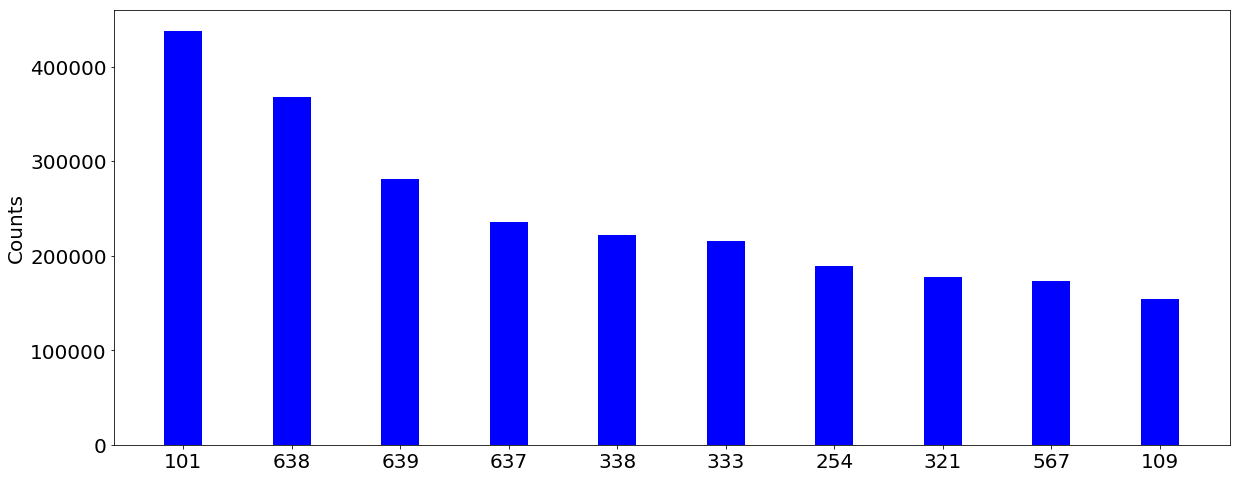

In [490]:
fig, ax = plt.subplots(figsize=(20,8))
width = 0.35 
plt.bar(range(10),pd_val,width,color='blue')
ax.set_ylabel('Counts', fontsize=20)
plt.xticks(range(10),pd_key)
plt.tick_params(labelsize=20)
fig.savefig('top10pdcd.jpg')

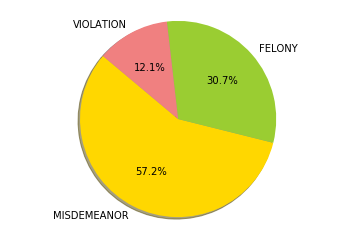

In [528]:
value_dic, dtype_dic, stype_dic, label_dic = readDict('./output/LAW_CAT_CD.out', '\t')
l1 = sorted(value_dic.items(), key=lambda x: x[1], reverse=True)
x = [i[0] for i in l1]
y = [i[1] for i in l1]
labels = x
sizes = y
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.savefig('LAWPie.jpg')

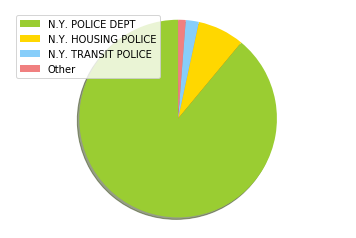

In [527]:
value_dic, dtype_dic, stype_dic, label_dic = readDict('./output/JURIS_DESC.out', '\t')
l1 = sorted(value_dic.items(), key=lambda x: x[1], reverse=True)
x = [i[0] for i in l1]
y = [i[1] for i in l1]
xx = x[:3]
xx.append('Other')
yy = y[:3]
yy.append(sum([i for i in y[3:]]))
labels = xx
sizes = yy
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

 
# Plot
patches, texts = plt.pie(sizes, colors = colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
 
plt.axis('equal')
plt.savefig('JURISPie.jpg')

In [565]:
def dic2np(dic):
    list_tmp = []
    for k in value_dic:
        for i in range(value_dic[k]):
            list_tmp.append(float(k) if float(k) > 0 else -float(k))
    return np.array(list_tmp)

In [626]:
value_dic, dtype_dic, stype_dic, label_dic = readDict('./output/Longitude.out', '\t')
del value_dic['NULL']
l1 = dic2np(value_dic)
value_dic, dtype_dic, stype_dic, label_dic = readDict('./output/Latitude.out', '\t')
del value_dic['NULL']
l2 = dic2np(value_dic)

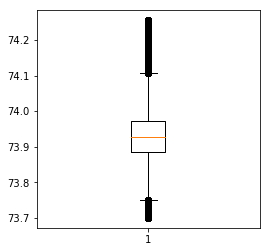

In [627]:
fig = plt.figure(figsize = (4,4))
a = plt.boxplot(l1)
fig.savefig('BoxLongi.jpg')

In [629]:
[item.get_ydata()[1] for item in a['whiskers']]

[73.751233647000006, 74.106266945000002]

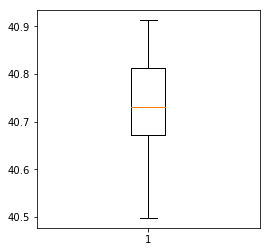

In [610]:
fig = plt.figure(figsize = (4,4))
plt.boxplot(l2)
fig.savefig('BoxLati.jpg')

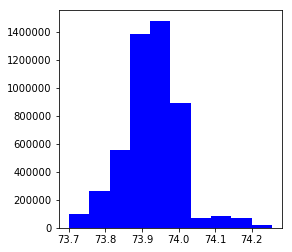

In [613]:
fig = plt.figure(figsize = (4,4))
plt.hist(l1,color='blue')
fig.savefig('HistLongi.jpg')

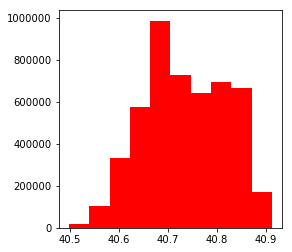

In [614]:
fig = plt.figure(figsize = (4,4))
plt.hist(l2,color='red')
fig.savefig('HistLati.jpg')

In [623]:
value_dic, dtype_dic, stype_dic, label_dic = readDict('./output/X_COORD_CD.out', '\t')
del value_dic['NULL']
l1 = dic2np(value_dic)
value_dic, dtype_dic, stype_dic, label_dic = readDict('./output/Y_COORD_CD.out', '\t')
del value_dic['NULL']
l2 = dic2np(value_dic)

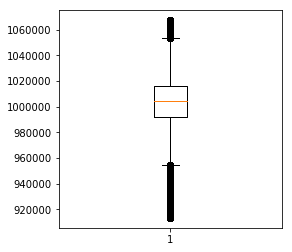

In [624]:
fig = plt.figure(figsize = (4,4))
a = plt.boxplot(l1)
fig.savefig('BoxX.jpg')

In [625]:
[item.get_ydata()[1] for item in a['whiskers']]

[954846.0, 1053121.0]

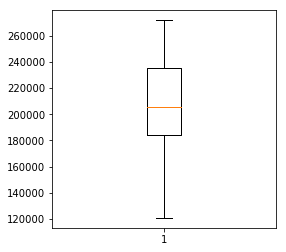

In [605]:
fig = plt.figure(figsize = (4,4))
plt.boxplot(l2)
fig.savefig('BoxY.jpg')

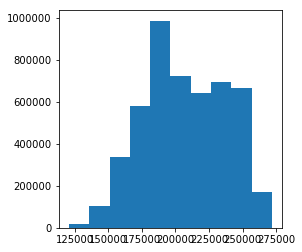

In [606]:
fig = plt.figure(figsize = (4,4))
plt.hist(l2)
fig.savefig('HistY.jpg')

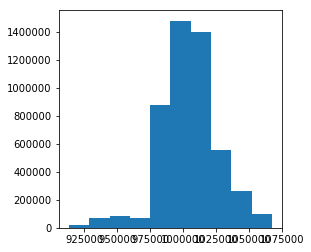

In [607]:
fig = plt.figure(figsize = (4,4))
plt.hist(l1)
fig.savefig('HistX.jpg')